In [1]:
import numpy as np
import pandas as pd



In [2]:
# Load the dataset

df = pd.read_csv('dataset.csv')

In [3]:
# Display the first few rows of the dataset

df.head()

,Title,Body,Tag
0,Make a dynamic GridView to fit screen android,<p>I have a GridView that can contain NxM Cust...,android
1,image/video processing options,<p>I have a small 12 volt board camera that is...,python
2,Error while using HttpConnection,<p><strong>QUESTION</strong></p>\n\n<p>I am tr...,java
3,Marker icon not showing up but is clickable,<p>I've got the following code which gets info...,android
4,Swift - Trouble with SKAction sequence,<p>I'm trying to move my background image down...,ios


In [4]:
# Display the shape of the dataset

df.shape

(22164, 3)

In [5]:
# Display basic information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   22164 non-null  object
 1   Body    22164 non-null  object
 2   Tag     22164 non-null  object
dtypes: object(3)
memory usage: 519.6+ KB


In [6]:
# Display the count of missing values in each column
df.isna().sum()


Title    0
Body     0
Tag      0
dtype: int64

In [7]:
# Display the count of each unique value in the 'Tag' column

df['Tag'].value_counts()


Tag
javascript    3272
java          3115
c#            2723
php           2680
android       2498
jquery        2099
python        1726
html          1527
c++           1298
ios           1226
Name: count, dtype: int64

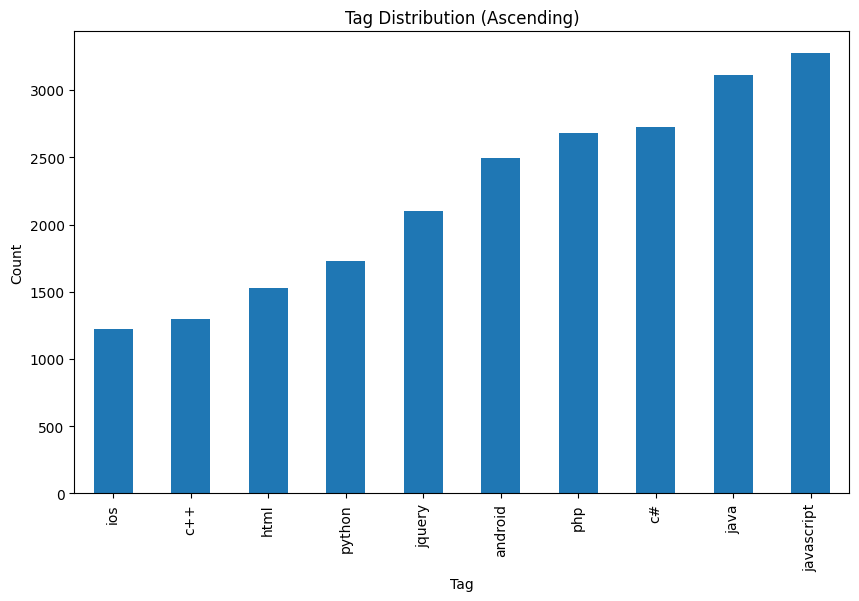

In [8]:
#visualizing the Tag column

import matplotlib.pyplot as plt

# Count the occurrences of each unique tag
tag_counts = df['Tag'].value_counts().sort_values()

# Plot the tag counts in ascending order
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Tag Distribution (Ascending)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [9]:
# Drop the column 'body'
df = df.drop(columns=['Body'])

# Verify the column has been dropped by displaying the first few rows

print(df.head())



                                           Title      Tag
0  Make a dynamic GridView to fit screen android  android
1                 image/video processing options   python
2               Error while using HttpConnection     java
3    Marker icon not showing up but is clickable  android
4         Swift - Trouble with SKAction sequence      ios


In [10]:
#encode the target variable

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Tag' column
df['Tag_encoded'] = label_encoder.fit_transform(df['Tag'])

# Display the first few rows of the DataFrame
print(df.head())

                                           Title      Tag  Tag_encoded
0  Make a dynamic GridView to fit screen android  android            0
1                 image/video processing options   python            9
2               Error while using HttpConnection     java            5
3    Marker icon not showing up but is clickable  android            0
4         Swift - Trouble with SKAction sequence      ios            4


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary resources for nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing a single text
def preprocess_text(text):
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Title' column and save to 'Title_cleaned'
df['Title_cleaned'] = df['Title'].apply(preprocess_text)

# Display the preprocessed titles
print(df[['Title', 'Title_cleaned']].head(15))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Title  \
0       Make a dynamic GridView to fit screen android   
1                      image/video processing options   
2                    Error while using HttpConnection   
3         Marker icon not showing up but is clickable   
4              Swift - Trouble with SKAction sequence   
5   How to call the methods in a dll from javascript?   
6   Expecting a function in instanceof check, but ...   
7   Converting Miliseconds to Date returns 1970 as...   
8   jQuery List Filter not working (Uncaught TypeE...   
9                        Crash in iOS: XPC API Misuse   
10  How to change servlet request body in java fil...   
11  Text boxes appended by JS squish together unex...   
12                  Put A String In A ifstream Method   
13       Spring: create mocks instead of real objects   
14      Write HTML to screen with Javascript function   

                                        Title_cleaned  
0            make dynamic gridv

In [12]:
#splitting the data into training data and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Title_cleaned'],df['Tag_encoded'].values,random_state=42,test_size=0.3)

In [13]:
x_train

20615    putting button navigationitem titleview progra...
8361                         get list control groupbox wpf
19724    use html section id contact semantically corre...
20035          numba error notimplementederror unable cast
17627                  access html form element javascript
                               ...                        
11964             would search certain word character java
21575                         convert image url hex string
5390                 retrieve property value array literal
860                       getlongarrayextra returning null
15795       jquery form validator showing validate functon
Name: Title_cleaned, Length: 15514, dtype: object

In [14]:
y_train

array([4, 1, 3, ..., 6, 5, 8])

In [15]:
x_test

5094     custom uistoryboardsegue use presentviewcontro...
5982     attempt invoke virtual method void android gra...
21701                     tomcat home page coming properly
2638             creating application dock icon mac c mono
19076                         copying file isolatedstorage
                               ...                        
15555                          find reference child method
5942        memory model apache modwsgi application python
10838            child view custom view render marshmallow
19970                c simple cache design function output
116                                rerun remote validation
Name: Title_cleaned, Length: 6650, dtype: object

In [16]:
y_test

array([4, 5, 5, ..., 0, 2, 6])

In [17]:
# Import the TfidfVectorizer class from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object

tfidf_vectorizer = TfidfVectorizer()


In [18]:
# Transform the training data (x_train) into TF-IDF features

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the testing data (x_test) using the same vocabulary learned from the training data

x_test_tfidf = tfidf_vectorizer.transform(x_test)




In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
count_vectorizer = CountVectorizer()


# Transform the training data (x_train) into CountVector features
x_train_count = count_vectorizer.fit_transform(x_train)

# Transform the testing data (x_test) using the same vocabulary learned from the training data
x_test_count = count_vectorizer.transform(x_test)

In [20]:
#model creation using tfidf vectorized data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Dictionary to store model names and corresponding models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
}

# Iterate over models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_tfidf)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test,y_pred)
    
    # Print the evaluation metrics
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(report)
    print("*************************************")
    print("*************************************")
    


K-Nearest Neighbors:
  Accuracy: 0.40
              precision    recall  f1-score   support

           0       0.37      0.59      0.46       691
           1       0.39      0.45      0.42       843
           2       0.39      0.34      0.37       397
           3       0.26      0.24      0.25       483
           4       0.66      0.32      0.43       396
           5       0.51      0.38      0.44       955
           6       0.36      0.34      0.35       930
           7       0.33      0.29      0.31       614
           8       0.50      0.40      0.44       811
           9       0.37      0.55      0.44       530

    accuracy                           0.40      6650
   macro avg       0.41      0.39      0.39      6650
weighted avg       0.41      0.40      0.40      6650

*************************************
*************************************
Decision Tree:
  Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.59      0.60      0

In [21]:
#model creation using count vectorized data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Dictionary to store model names and corresponding models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
}

# Iterate over models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_count, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_count)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test,y_pred)
    
    # Print the evaluation metrics
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(report)
    print("*************************************")
    print("*************************************")
    


K-Nearest Neighbors:
  Accuracy: 0.40
              precision    recall  f1-score   support

           0       0.43      0.60      0.50       691
           1       0.30      0.40      0.34       843
           2       0.19      0.39      0.25       397
           3       0.33      0.23      0.27       483
           4       0.74      0.30      0.43       396
           5       0.57      0.35      0.43       955
           6       0.37      0.36      0.36       930
           7       0.41      0.36      0.38       614
           8       0.62      0.44      0.52       811
           9       0.46      0.54      0.50       530

    accuracy                           0.40      6650
   macro avg       0.44      0.40      0.40      6650
weighted avg       0.45      0.40      0.41      6650

*************************************
*************************************
Decision Tree:
  Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.62      0.60      0

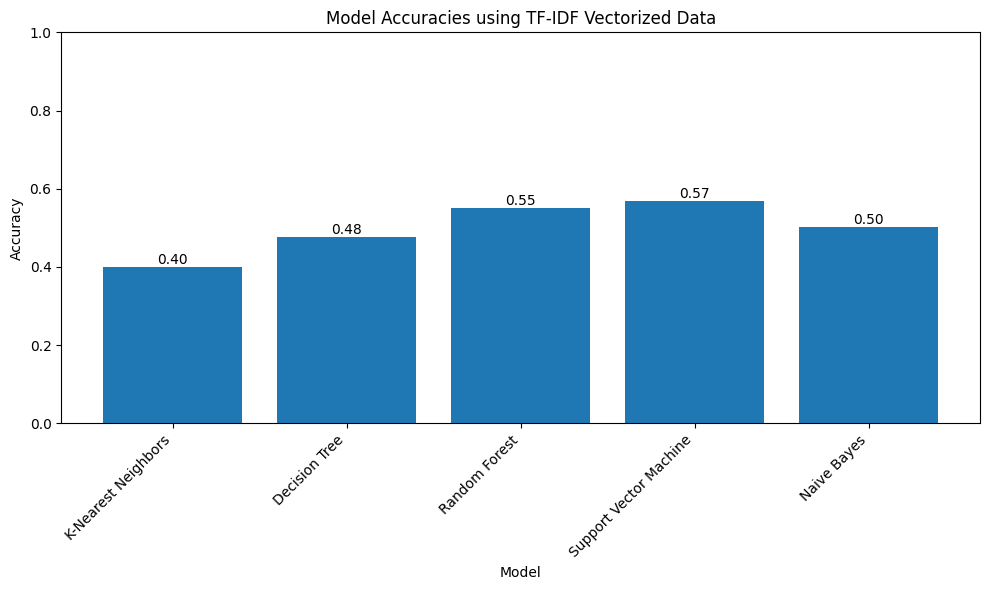

In [22]:
import matplotlib.pyplot as plt

# List to store model names and their accuracies
model_names = []
accuracies = []

# Iterate over models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model name and accuracy to lists
    model_names.append(model_name)
    accuracies.append(accuracy)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracies using TF-IDF Vectorized Data')

# Adding accuracy labels on bars
for i in range(len(model_names)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Setting limit from 0 to 1 for accuracy
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.show()


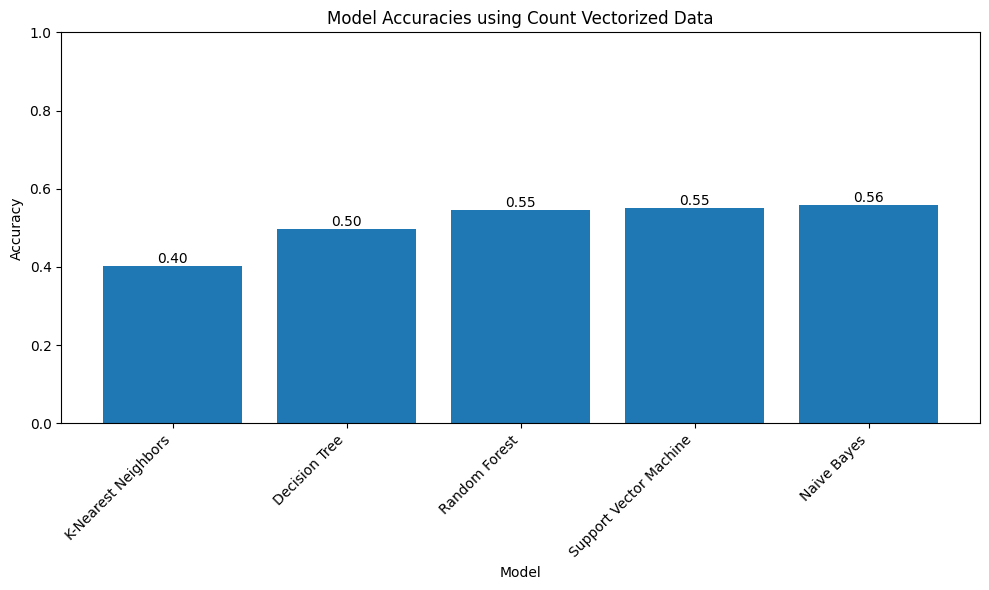

In [23]:
import matplotlib.pyplot as plt

# List to store model names and their accuracies
model_names_count = []
accuracies_count = []

# Iterate over models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_count, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_count)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model name and accuracy to lists
    model_names_count.append(model_name)
    accuracies_count.append(accuracy)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names_count, accuracies_count)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracies using Count Vectorized Data')

# Adding accuracy labels on bars
for i in range(len(model_names_count)):
    plt.text(i, accuracies_count[i], f'{accuracies_count[i]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Setting limit from 0 to 1 for accuracy
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.show()


In [24]:
#saving the model which have higher accuracy
import joblib

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train_tfidf, y_train)

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model_tfidf.joblib')

['svm_model_tfidf.joblib']

In [25]:
import joblib

# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')



['tfidf_vectorizer.joblib']